<a href="https://colab.research.google.com/github/cristiandarioortegayubro/Ciencia-de-Datos-en-Ciencias-Economicas-con-Python/blob/master/Visualizaciones_MatPlotLib_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MatPlotLib** - Mis Primeras Visualizaciones - **01**

## **Código** - Limpieza y Transformación de Datos - **03**

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as data
BTC2019 = data.DataReader("BTC-USD", start="2018-12-31", end="2019-12-31", data_source="yahoo")
df = pd.DataFrame(BTC2019)
df.insert(0,column="Date",value=df.index.values)
df.reset_index(drop=True, inplace=True)
df.insert(1,column="Day",value=pd.DatetimeIndex(df['Date']).day_name())
df.insert(2,column="Month",value=pd.DatetimeIndex(df['Date']).month_name())
df.rename(columns={'Adj Close':'Adj_Close'}, inplace=True)
df['Pct_Change'] = df.Adj_Close.pct_change()*100
df['Diff'] = df.Adj_Close.diff()
df['Eval'] = df.eval('Close >= Open')
df.dropna(how='any', inplace=True)
pd.options.display.precision = 2
df.drop(['High','Low','Open','Close','Volume'], axis=1, inplace=True)
df.head()

,Date,Day,Month,Adj_Close,Pct_Change,Diff,Eval
1,2019-01-01,Tuesday,January,3843.52,2.69,100.82,True
2,2019-01-02,Wednesday,January,3943.41,2.60,99.89,True
3,2019-01-03,Thursday,January,3836.74,-2.70,-106.67,False
4,2019-01-04,Friday,January,3857.72,0.55,20.98,True
5,2019-01-05,Saturday,January,3845.19,-0.32,-12.52,False


## Cargando la librería

In [2]:
import matplotlib.pyplot as plt

## Formatos disponibles 
Podemos visualizar cuales son los formatos disponibles y de esa forma elegir uno, para establecer el aspecto de nuestro gráfico

In [3]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


## Mi primera visualización

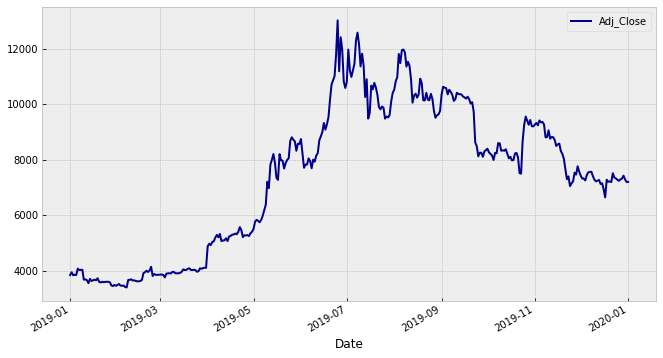

In [4]:
plt.style.use('bmh')
df.plot('Date','Adj_Close', kind='line', figsize=(11,6), color='darkblue')

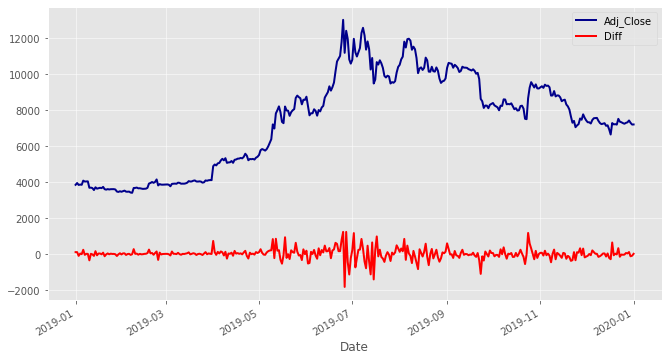

In [5]:
plt.style.use('ggplot')
df.plot('Date',['Adj_Close','Diff'], kind='line', figsize=(11,6), color=['darkblue','Red'])

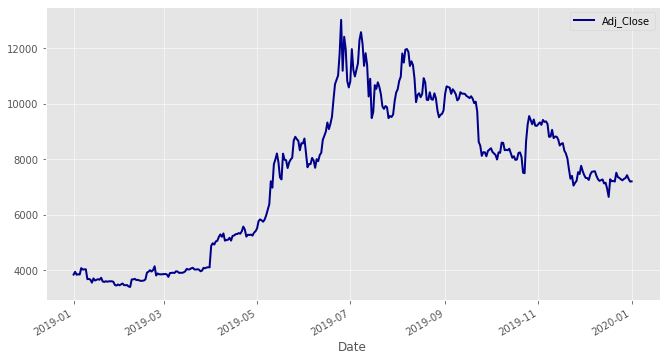

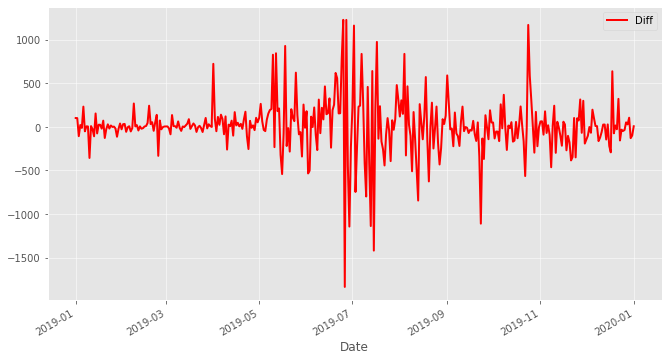

In [6]:
plt.style.use('tableau-colorblind10')
df.plot('Date','Adj_Close', kind='line', figsize=(11,6), color='darkblue')
df.plot('Date','Diff', kind='line', figsize=(11,6), color='red')

## Tipo de Gráfico Lineal

### Agregando Título del Grafico y Titulo del Eje Y

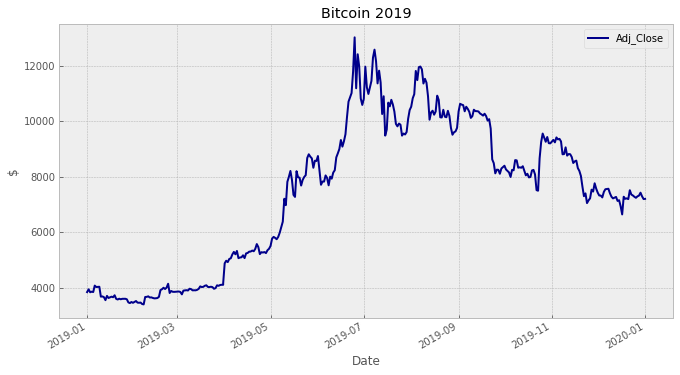

In [7]:
plt.style.use('bmh')
df.plot('Date','Adj_Close', kind='line', figsize=(11,6), color='darkblue', title='Bitcoin 2019', ylabel = '$')

## Tipo de Gráfico Histograma

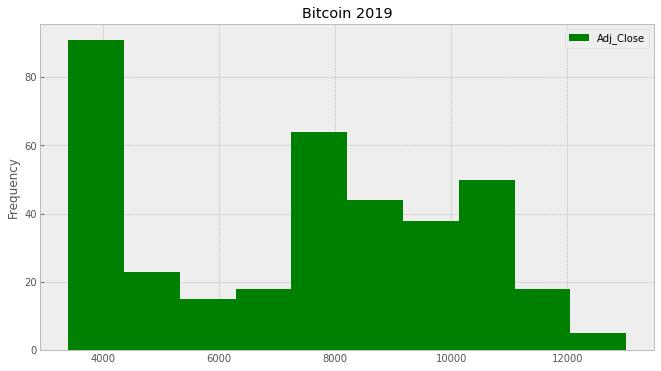

In [8]:
plt.style.use('bmh')
df.plot('Date','Adj_Close', kind='hist', figsize=(11,6), color='Green', title='Bitcoin 2019', xlabel = '$')

## Tipo de Gráfico Estimación de la Densidad

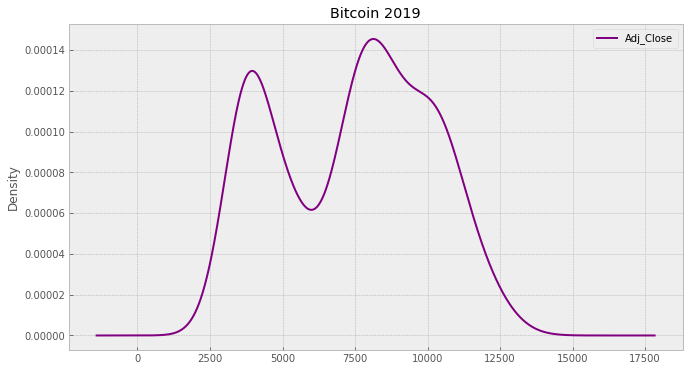

In [9]:
plt.style.use('bmh')
df.plot('Date','Adj_Close', kind='kde', figsize=(11,6), color='purple', title='Bitcoin 2019', xlabel = '$')

## Tipo de Gráfico Area

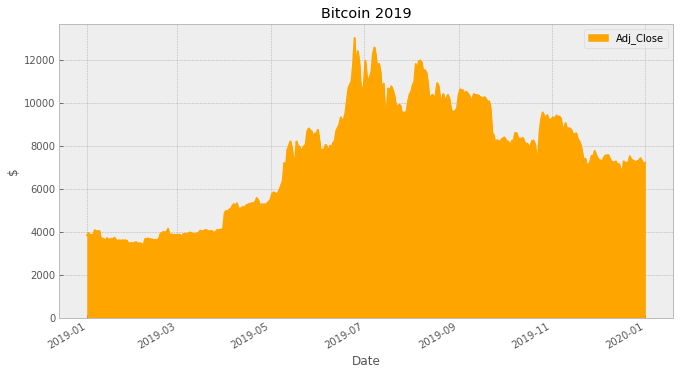

In [10]:
plt.style.use('bmh')
df.plot('Date','Adj_Close', kind='area', figsize=(11,6), color='orange', title='Bitcoin 2019', ylabel = '$')

## Otra forma de graficar...

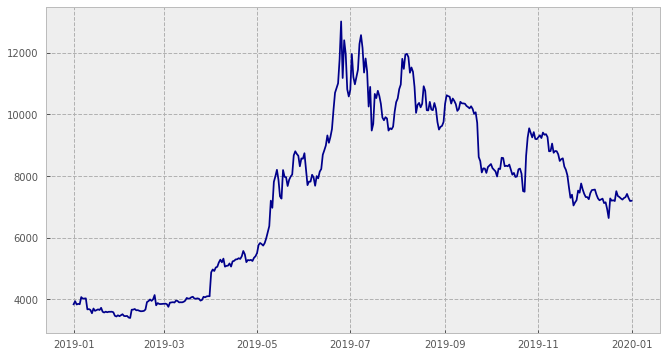

In [11]:
plt.style.use('seaborn-notebook')
plt.figure(figsize=(11,6))
plt.plot(df.Date, df.Adj_Close, color='darkblue')